### **Testing Plant Disease Prediction Model**

### #1 Importing Libraries

In [1]:
# importing the required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random
import math

2025-12-26 19:17:07.283676: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-26 19:17:07.317229: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-26 19:17:08.903415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 19:17:12.679646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

## #2 Loading Model

In [3]:
# loading the saved model
loaded_model = tf.keras.models.load_model("../trained_model/plant_disease_trained_model.keras")

2025-12-26 19:22:34.195639: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## #3 Model Summary

In [4]:
# getting the model summary
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

## #4 Initializing the Disease Classes (For Prediction)

In [5]:
# defining the class names
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## #5 Visualizing Single Image of Test Set

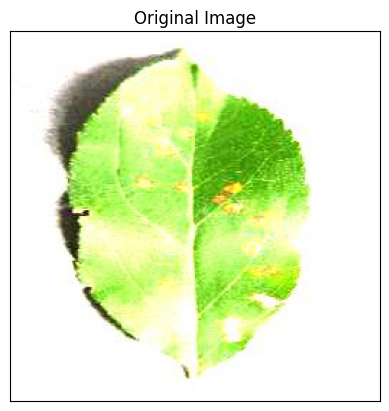

In [6]:
# for locating specific image paths
from pathlib import Path

# specifying the image path 
image_path = "../test_images/AppleCedarRust1.JPG"
image_name = Path(image_path).stem

# reading the image using OpenCV
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR image to RGB

# displaying the RGB mage
plt.imshow(img)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

## #6 Testing Model on a Single Image

In [7]:
# preprocessing the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image to batch format
print(input_arr.shape)

(1, 128, 128, 3)


In [8]:
# making prediction on the input image and displaying the result
prediction = loaded_model.predict(input_arr)
prediction, prediction.shape

2025-12-26 19:24:50.688123: I external/local_xla/xla/service/service.cc:163] XLA service 0x5c036fcb9970 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-12-26 19:24:50.688153: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
2025-12-26 19:24:50.850490: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1766777091.877474  251234 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(array([[1.0904767e-08, 1.1429045e-10, 9.9994719e-01, 6.6675766e-13,
         7.9544748e-08, 2.8694583e-08, 9.7314707e-14, 2.5135810e-10,
         8.9986874e-16, 1.2213823e-13, 5.0604954e-15, 6.6782184e-09,
         1.6344466e-09, 2.2154156e-10, 8.2191641e-12, 1.1945728e-07,
         1.0985322e-09, 2.0024224e-11, 1.8528409e-09, 5.0011369e-08,
         2.8711812e-13, 2.7110644e-12, 2.2679136e-10, 7.6939372e-11,
         3.0578722e-13, 3.5335436e-11, 7.0541489e-11, 2.0362694e-11,
         9.1060451e-07, 8.8951174e-06, 3.7235468e-06, 5.1767785e-11,
         2.5870742e-08, 6.3513167e-11, 1.2348391e-06, 3.7619586e-05,
         1.1248782e-07, 4.7826060e-08]], dtype=float32),
 (1, 38))

In [9]:
# getting and displaying the index of the class with highest probability
result_indx = np.argmax(prediction)
print(result_indx)

2


In [ ]:
# function to extract the disease name from the image
import re

def format_label(text):
    # removing digits from the end of the string
    text = re.sub(r'\d+$', '', text)
    
    # inserting space before capital letters
    formatted = re.sub(r'(?<!^)(?=[A-Z])', '_', text)
    
    return formatted

### Predicting for a Single image

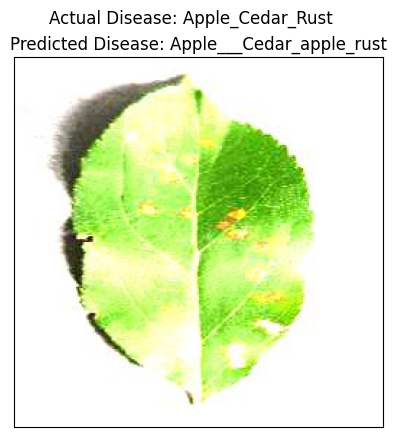

In [17]:
# displaying result of disease prediction on the image
model_prediction = class_names[result_indx]
plt.imshow(img)
plt.suptitle(f"Actual Disease: {format_label(image_name)}")
plt.title(f"Predicted Disease: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

## #7 Predicting for a random batch of images

In [ ]:
# importing additional libraries
from pathlib import Path

# function to visualize batch predictions
def visualize_batch_predictions(folder_path, model, class_names, num_images=9, columns=3):
    
    # select the images
    all_image_paths = glob.glob(folder_path)
    
    if not all_image_paths:
        print(f"No images found in {folder_path}")
        return

    # select images at random
    selected_paths = random.sample(all_image_paths, min(len(all_image_paths), num_images))

    # setting up the subplots
    rows = math.ceil(len(selected_paths) / columns)
    fig, axes = plt.subplots(rows, columns, figsize=(5 * columns, 5 * rows))
    
    # handling scenarios where only 1 image is selected
    if num_images == 1:
        axes = np.array([axes])
        
    axes_flat = axes.flatten()

    # looping through the selected images and processing the predictions
    for i, ax in enumerate(axes_flat):
        if i < len(selected_paths):
            path = selected_paths[i]
            img_name = Path(path).stem

            # reading the image for display
            img = cv2.imread(path)
            if img is None:
                print(f"Failed to load image: {path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # preprocessing the image
            image_tensor = tf.keras.preprocessing.image.load_img(path, target_size=(128, 128))
            input_arr = tf.keras.preprocessing.image.img_to_array(image_tensor)
            input_arr = np.array([input_arr])

            # performing model prediction
            prediction = model.predict(input_arr, verbose=0)
            result_indx = np.argmax(prediction)
            model_prediction = class_names[result_indx]
            
            # Helper to format the actual label (assuming label is in filename)
            # You can replace this logic if your labels are stored differently
            actual_label = format_label(img_name)
            
            # plotting the results
            ax.imshow(img)

            # setting the title
            ax.set_title(f"Actual: {actual_label}\nPredicted: {model_prediction}", fontsize=12)
            ax.axis('off')
        else:
            # hiding empty subplots
            ax.axis('off')

    plt.tight_layout()
    plt.show()

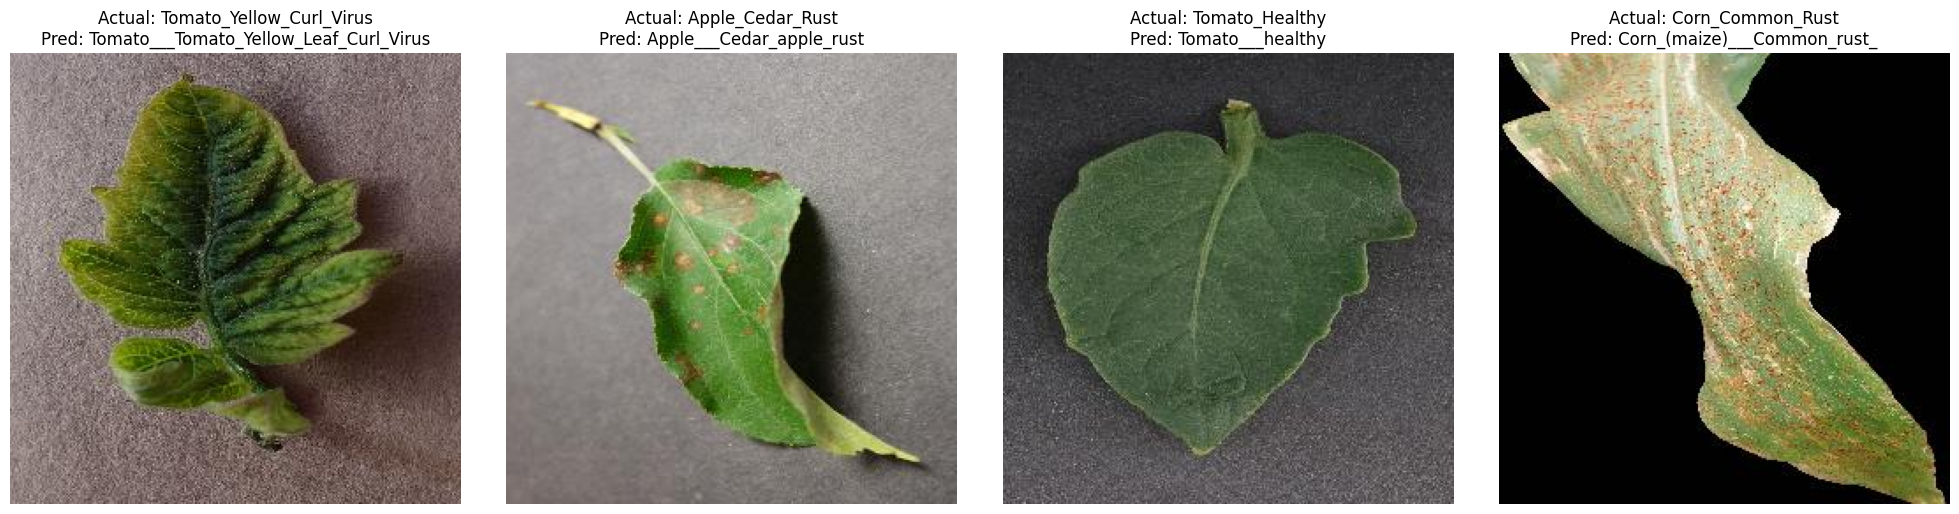

In [ ]:
visualize_batch_predictions(
    folder_path="../test_images/*",
    model=loaded_model, 
    class_names=class_names,
    num_images=4,            
    columns=4
)